In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = 100
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [3]:
df = pd.read_csv('data_eda_1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


### Split the dependent and independent variables

In [4]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

# Train Test Split

In [5]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=0, test_size=0.30)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 57)
y_train:  (35475,)
x_test:  (15204, 57)
y_test:  (15204,)


#### Build a full decision tree model on a train dataset

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

In [8]:
decision_tree=decision_tree_classification.fit(x_train,y_train)

#### Calculate performance measures on the train set.

In [9]:
train_pred = decision_tree.predict(x_train)

In [10]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25403
           1       1.00      1.00      1.00     10072

    accuracy                           1.00     35475
   macro avg       1.00      1.00      1.00     35475
weighted avg       1.00      1.00      1.00     35475



##### observation :

we can see model is 100% accurate on train data.

#### Calculate performance measures on the test set.

In [11]:
test_pred=decision_tree.predict(x_test)

In [12]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     10773
           1       0.35      0.37      0.36      4431

    accuracy                           0.62     15204
   macro avg       0.54      0.54      0.54     15204
weighted avg       0.62      0.62      0.62     15204



###  Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

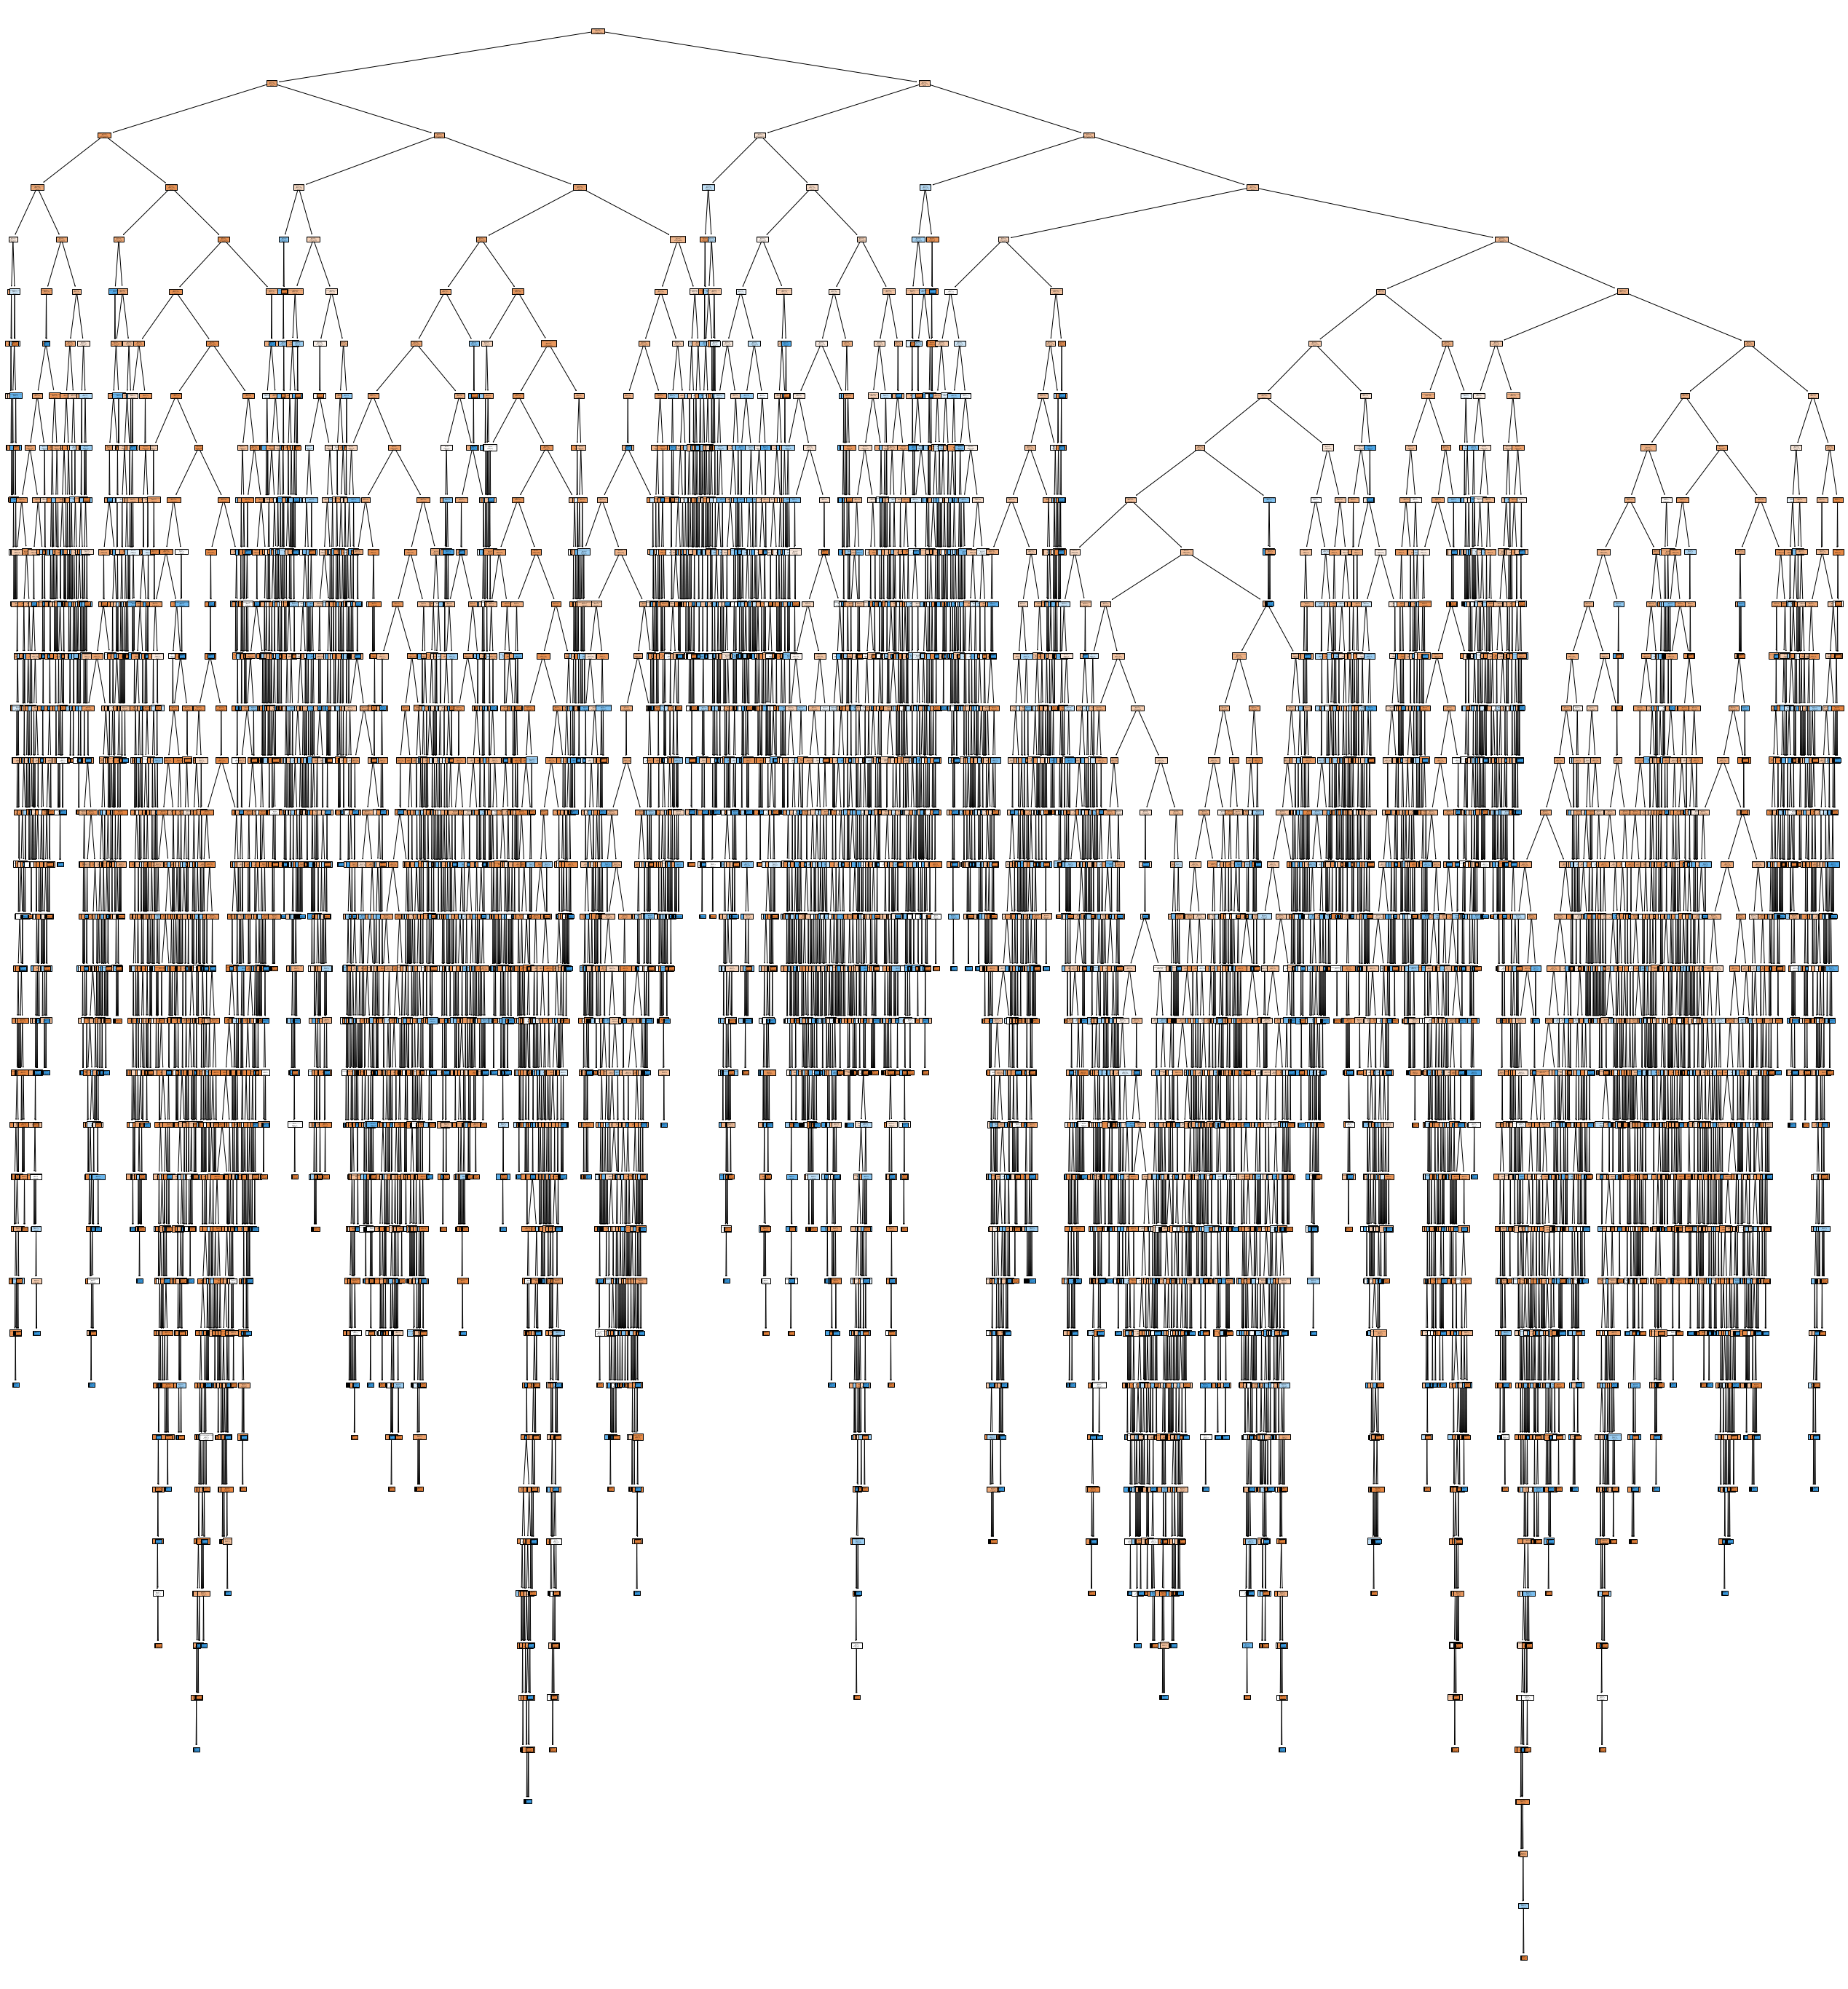

In [13]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(decision_tree,
                   feature_names=x_train.columns,  
                   class_names=["0","1"],
                   filled=True)

### Confusion matrix

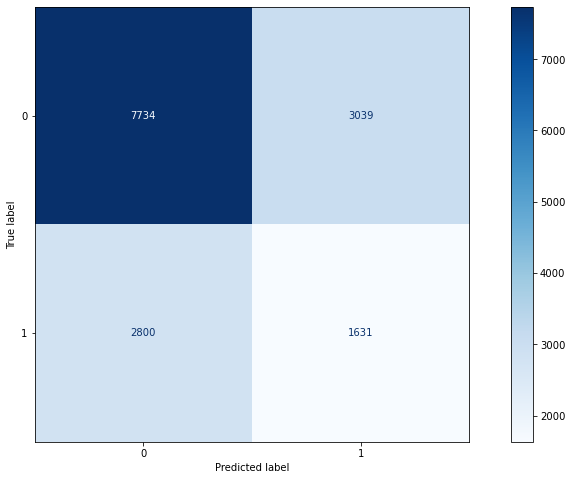

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,test_pred,cmap='Blues')

## Tune the Hyperparameters using GridSearchCV (Decision Tree)

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the GridSearchCV() and build the tree using the optimal values obtained using GridSearch method.

In [15]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion'
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(10, 20),
                     'max_features': ["sqrt", "log2"],
                    }]

In [16]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True, random_state=0)

In [17]:
DT=DecisionTreeClassifier(random_state=0)

In [18]:
gr_model=GridSearchCV(estimator=DT,
    param_grid=tuned_paramaters,cv=kf)

In [19]:
tree_grid_model=gr_model.fit(x_train,y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'} 



In [20]:
final_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'log2',random_state=10)

In [21]:
dt_model=final_model.fit(x_train,y_train)

## Performance measures on train model

In [22]:
y_pred=dt_model.predict(x_train)

In [23]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     25403
           1       0.64      0.12      0.20     10072

    accuracy                           0.73     35475
   macro avg       0.69      0.55      0.52     35475
weighted avg       0.71      0.73      0.66     35475



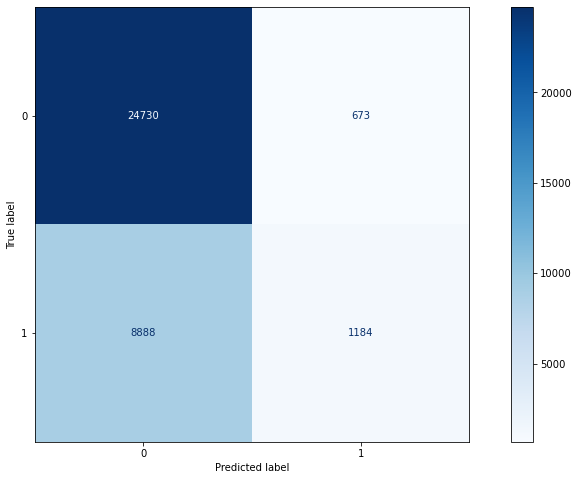

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_pred,cmap='Blues')

### Performance measures on test model

In [25]:
y_test_pred=dt_model.predict(x_test)

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     10773
           1       0.43      0.08      0.13      4431

    accuracy                           0.70     15204
   macro avg       0.58      0.52      0.48     15204
weighted avg       0.63      0.70      0.62     15204



#### Interpretation: From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

In [27]:
print('roc_auc_score',roc_auc_score(y_train,y_pred))

roc_auc_score 0.5455303400369522
